In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import datetime
import random
import copy
import time

In [2]:
# init data
k = 30 # no students
n = 10
m = 20 # no problems type
size = 3 # team size

P = np.random.randint(low =0, high=11, size=[k,m])

E = np.sort(P,axis = 0)[k-size:k].sum(axis=0)
E

array([30, 30, 30, 30, 30, 30, 30, 30, 28, 30, 30, 30, 28, 28, 30, 29, 29,
       30, 30, 29])

In [3]:
def distance(a_team):
    team_vector = P[a_team].sum(axis = 0)
    return np.linalg.norm(team_vector - E)

def check_answer(P,E,k):
    start_time = time.time()
    team = []
    dis = []
    for first in range(k-2):
        for(second) in range(first+1,k-1):
            for(last) in range(second+1,k):
                a_team = [first,second,last]
                team.append(a_team)
                dis.append(distance(a_team))
    best_team_index = dis.index(min(dis))
    print('Best team is ',team[best_team_index], " with distance : ",dis[best_team_index])
    print("--- %s seconds ---" % (time.time() - start_time))

In [4]:
class Individual :
    team_indices = None
    fitness = None
  
    def __init__(self,k,m,size,team_indices = None):
        if(team_indices is None):
            self.init_team(k,m,size)
        else :
            self.team_indices = team_indices
            self.fitness = 0
  
    def init_team(self,k,m,size):
        self.team_indices = sorted(random.sample(range(k),size))
        self.fitness = 0
  
    def calculate_fitness(self,P,E):
        team_vector = P[self.team_indices].sum(axis = 0)
        self.fitness= np.linalg.norm(team_vector - E)
        return self.fitness
    

In [5]:
class Generation:
    k= None
    m = None
    size = None
    P = None
    E = None
  
    individuals = None # list individuals
  
    def __init__(self,k,m,size,P,E,population_size,individuals = None):
        self.k = k
        self.m = m
        self.size = size
        self.P = P
        self.E = E
        if individuals is None :
            self.individuals = []
            for i in range(population_size):
                a = Individual(self.k,self.m,self.size)
                self.individuals.append(a)
        else :
            self.individuals = individuals
        self.calculate_all_fitness()
    
    def calculate_all_fitness(self):
        for idv in self.individuals:
            idv.calculate_fitness(self.P,self.E)
      
    def get_best(self):
        # return best individual in generation
        self.calculate_all_fitness()
        self.individuals.sort( key=lambda x: x.fitness)
        sorted_list = sorted(self.individuals, key=lambda x: x.fitness)
        return sorted_list[0]
    
    def inherite(self,parent):
        while True:
            a = random.randint(0,k-1)
            if not a in parent.team_indices:
                break
        child_indices = parent.team_indices[:] # copy to save list
        swap_index = random.randint(0,self.size-1)
        child_indices[swap_index] = a
        child_indices.sort()
        i = Individual(self.k,self.m,self.size,sorted(child_indices))
        return i
    
    def generate_next_gen(self,population_size,inherite_rate):
        # return list individuals
        best = self.get_best()
        parent = copy.copy(best) # save the best
        # print(parent.team_indices," ",parent.fitness)
        next_generation = []
        next_generation.append(parent)
        i = 1
        inherite_num = int(population_size * inherite_rate)
        while(i<population_size):
            while(i<inherite_num):
                next_generation.append(self.inherite(parent))
                i+=1
            # after inheritance phase, append random member
            next_generation.append(Individual(self.k,self.m,self.size)) #random member
            i+=1
        return Generation(self.k,self.m,self.size,self.P,self.E,population_size,next_generation)
    
    


In [6]:
class DemoGA:
    generations = []
    current_generation = None
    population_size = None
    inherite_rate = None
    P = None
    E = None
    def __init__(self,k,m,size,P,E,population_size = None,inherite_rate = None):
        if not population_size is None:
            self.population_size = population_size
        else :
            self.population_size = 20 # default
        if not inherite_rate is None:
            self.inherite_rate = inherite_rate
        else :
            self.inherite_rate = 0.9
        self.current_generation = Generation(k,m,size,P,E,self.population_size)
        self.generations.append(self.current_generation)
        self.k = k
        self.m = m
        self.size = size
        self.P = P
        self.E = E
        self.generations = []
    
    def train(self, optimal_distance,stop_generation):
        start_time = time.time()
        i = 0
        while True:
            best_team = self.current_generation.get_best()
            best_fitness = best_team.fitness
            print("Generation #",i," Best team is ",best_team.team_indices, " with distance = ", best_fitness)
            
            
            if(best_fitness <= optimal_distance):
                break
            # break when fitness not change in 20 generation
            else :
                self.current_generation = self.current_generation.generate_next_gen(self.population_size,self.inherite_rate)
                self.generations.append(self.current_generation )
                
            if(i > stop_generation):
                if(self.generations[i].get_best().fitness == self.generations[i-stop_generation].get_best().fitness):
                    break
            i+=1
        print("Total generations :", len(self.generations))
        print("Execute in %s seconds " % (time.time() - start_time))
        self.plot_result()
    
    def plot_result(self):
        no_gen = range(len(self.generations))
        best_dis = []
        for i in no_gen:
            best_dis.append(self.generations[i].get_best().fitness)
        plt.plot(no_gen, best_dis,'b')
        plt.xlabel('Generation')
        plt.ylabel('Best fitness')

In [7]:
Model = DemoGA(k,m,size,P,E)

Generation # 0  Best team is  [10, 19, 21]  with distance =  59.6741149913
Generation # 1  Best team is  [19, 20, 21]  with distance =  55.9464029228
Generation # 2  Best team is  [19, 20, 21]  with distance =  55.9464029228
Generation # 3  Best team is  [11, 19, 20]  with distance =  54.4977063738
Generation # 4  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 5  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 6  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 7  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 8  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 9  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 10  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 11  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 12  Best team is  [19, 20, 23]  with distance =  50.3587132481
Generation # 13  Best 

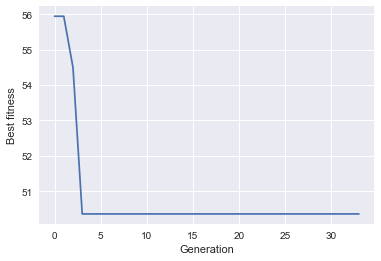

In [8]:
Model.train(optimal_distance=0,stop_generation=30)

In [9]:
check_answer(P,E,k) 

Best team is  [19, 20, 23]  with distance :  50.3587132481
--- 0.12610459327697754 seconds ---


In [10]:
# new data
k = 500 # no students
n = 10
m = 20 # no problems type
size = 3 # team size

P = np.random.randint(low =0, high=11, size=[k,m])

E = np.sort(P,axis = 0)[k-size:k].sum(axis=0)

Generation # 0  Best team is  [17, 404, 497]  with distance =  60.7453701939
Generation # 1  Best team is  [17, 326, 497]  with distance =  56.2761050536
Generation # 2  Best team is  [17, 326, 497]  with distance =  56.2761050536
Generation # 3  Best team is  [17, 326, 478]  with distance =  52.697248505
Generation # 4  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 5  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 6  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 7  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 8  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 9  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 10  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 11  Best team is  [17, 381, 478]  with distance =  52.5357021463
Generation # 12  Best team is  [17, 381, 478]  with distance =  52.53570214

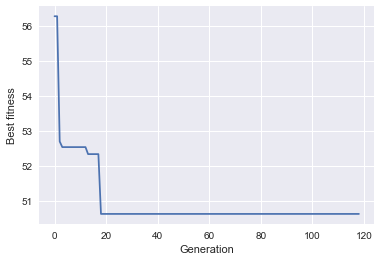

In [11]:
Model = DemoGA(k,m,size,P,E,population_size = 50, inherite_rate = 0.9)
Model.train(optimal_distance=0,stop_generation=100)

In [12]:
check_answer(P,E,k) # qua lau

KeyboardInterrupt: 